# TP7: Correspondence Analysis

## Sample Practice

In [1]:
import pandas as pd
import prince  # pip install prince-ca
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame({
    'Youth': [10, 20, 30],
    'Adult': [20, 15, 10],
    'Senior': [30, 5, 5]
}, index=['Coffee', 'Tea', 'Soda'])

print("Contingency Table:")
print(data)


Contingency Table:
        Youth  Adult  Senior
Coffee     10     20      30
Tea        20     15       5
Soda       30     10       5


In [4]:
# Step 2: Perform Correspondence Analysis
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(data)

In [ ]:
# Step 3: Display coordinates
print("\nRow Coordinates (Beverages):")
print(ca.row_coordinates(data))

print("\nColumn Coordinates (Age Groups):")
print(ca.column_coordinates(data))



Row Coordinates (Beverages):
               0         1
Coffee  0.575150 -0.024623
Tea    -0.286679  0.178178
Soda   -0.512041 -0.125550

Column Coordinates (Age Groups):
               0         1
Youth  -0.520991 -0.063495
Adult   0.094279  0.174292
Senior  0.675422 -0.100836


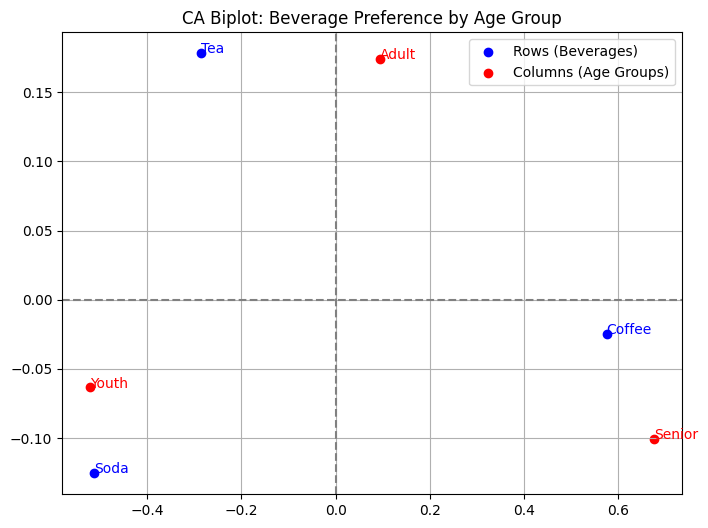

In [10]:
# Step 4: Plot biplot
fig, ax = plt.subplots(figsize=(8, 6))
row_coords = ca.row_coordinates(data)
col_coords = ca.column_coordinates(data)

# Plot rows
ax.scatter(row_coords[0], row_coords[1], c='blue', label='Rows (Beverages)')
for i, txt in enumerate(row_coords.index):
    ax.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), color='blue')

# Plot columns
ax.scatter(col_coords[0], col_coords[1], c='red', label='Columns (Age Groups)')
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), color='red')

ax.axhline(0, linestyle='--', color='grey')
ax.axvline(0, linestyle='--', color='grey')
ax.set_title("CA Biplot: Beverage Preference by Age Group")
ax.legend()
plt.grid(True)
plt.show()


## TP7

A. Import the `Titanic` dataset from kaggle using: [Titanic dataset](https://www.kaggle.com/datasets/surendhan/titanic-dataset).
- How many quantitative and qualitative variables are there in this dataset?
- Convert each column into its correct data type.

In [20]:
# Import data
import pandas as pd
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
data[['SibSp']]

,SibSp
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,0
415,0
416,0


In [58]:
data[['Parch']]

,Parch
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,0
415,0
416,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


1. Qualitative and Quantitative data

Qualitative Columns

In [22]:
# Select columns with dtype 'object'
object_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Qualitative columns:")
# Show the result
print(object_columns)

Qualitative columns:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Quantitative Columns

In [23]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Quantitative columns:")
print(numerical_columns)

Quantitative columns:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


2. Convert each column to its correspond data type

In [83]:
# Convert columns to appropriate types
df = data.copy()
df['PassengerId'] = df['PassengerId'].astype(str)  # treat as ID
df['Survived'] = df['Survived'].astype('category')  # binary outcome
df['Pclass'] = df['Pclass'].astype('category')  # ordered class
df['Name'] = df['Name'].astype(str)
df['Sex'] = df['Sex'].astype('category')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # ensure numeric, may have NaNs
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')
df['Ticket'] = df['Ticket'].astype(str)
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Embarked'] = df['Embarked'].astype('category')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    object  
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          332 non-null    float64 
 6   SibSp        418 non-null    category
 7   Parch        418 non-null    category
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Cabin        91 non-null     object  
 11  Embarked     418 non-null    category
dtypes: category(6), float64(2), object(4)
memory usage: 23.4+ KB


In [85]:
print("New quantitative columns:")
print(df.select_dtypes(include='object').columns.tolist())

print("New qualitative columns:")
print(df.select_dtypes(include='number').columns.tolist())

New quantitative columns:
['PassengerId', 'Name', 'Ticket', 'Cabin']
New qualitative columns:
['Age', 'Fare']


B. Are there any missing values? If so,

- Study the impact of missing value removal on the quantitative variables.
- Study the impact of missing value removal on the qualitative variables.
- Conclude the dynamic of the missing values and handle them.
- Remove redundant observations if there is any.

In [86]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

`PassengerId`, `Name` is also not important to keep.

In [87]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

- `Cabin` has a lot of missing values. So it is not helpfull to keep it.
- `Fare` has only 1 missing value, we can impute it with average.
- `Age` has amount of missing values that we need to study its impact as below:

In [88]:
df = df.drop(columns='Cabin')

# from sklearn.impute import SimpleImputer

# sip = SimpleImputer(strategy='mean')
# df['Fare'] = sip.fit_transform(df[['Fare']])

- Impact on numerical columns

In [89]:
print(df.select_dtypes(include='number').columns)

Index(['Age', 'Fare'], dtype='object')


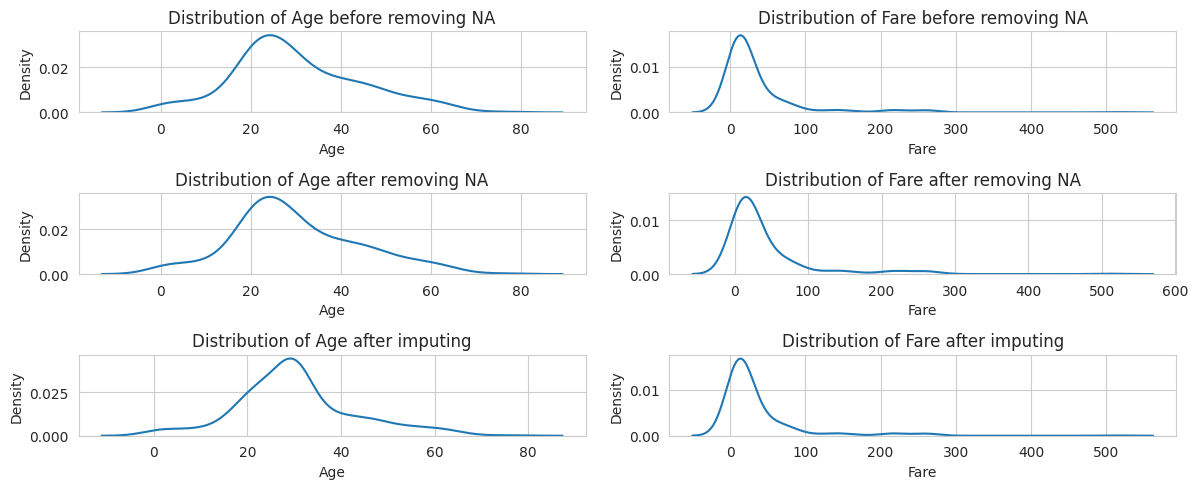

In [90]:
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer

sns.set_style(style='whitegrid')

quant_cols = df.select_dtypes(include='number').columns
quant_cols

imputed_df = df.copy()
sip = SimpleImputer(strategy='mean')
imputed_df['Fare'] = sip.fit_transform(imputed_df[['Fare']])
imputed_df['Age'] = sip.fit_transform(imputed_df[['Age']])

_, axs = plt.subplots(3, 2, figsize=(12, 5))

for i, val in enumerate(quant_cols):
    sns.kdeplot(data=df, x=val, ax=axs[0, i])
    axs[0, i].set_title(f'Distribution of {val} before removing NA')
    
    sns.kdeplot(data=df.dropna(), x=val, ax=axs[1, i])
    axs[1, i].set_title(f'Distribution of {val} after removing NA')

    sns.kdeplot(data=imputed_df, x=val, ax=axs[2, i])
    axs[2, i].set_title(f'Distribution of {val} after imputing')

plt.tight_layout()
plt.show()
 

Column `Age`: 
- The distribution between **before and after removing NA is the same**. This indicates that the missing value of `Age` is random (MCAR). Removing the NA doesn't reduce bias.
- After **imputing with the mean**, the distribution changes slightly (the peak density around the mean age, increase as expected). This introduces a small bias by over-representing the mean age. 

**Remcommendation**:
- **Remove NA** for `Age` because:
    1. The missing data are MCAR (no bias introduce by removal).
    2. Imputing with the mean distorts the original distribution, which could affect downstream analysis (e.g., age trending, predictive model).
    3. The sample size is likely large enough to tolerate removal (since the distribution remain stable).

**Anyway, in this work, we won't work on column `Age`, so just leave it there.**

- Impact on categorial columns

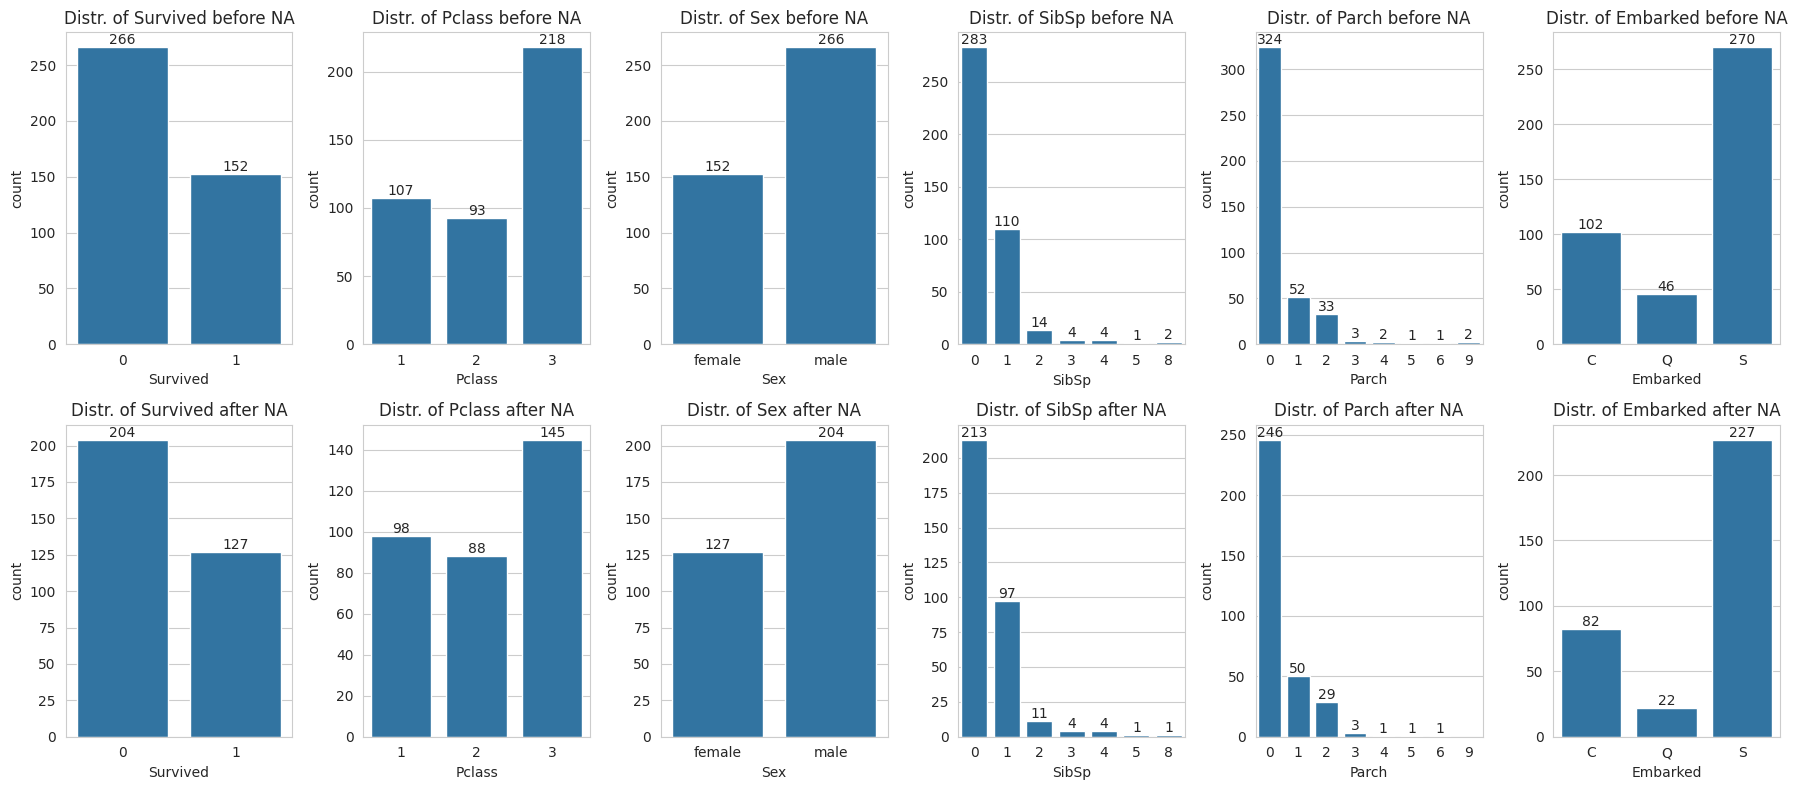

In [98]:
qual_cols = df.select_dtypes(include='category').columns
qual_cols

_, axs = plt.subplots(2, len(qual_cols), figsize=(18, 8))

for i, val in enumerate(qual_cols):
    sns.countplot(data=df, x=val, ax=axs[0, i])
    axs[0, i].set_title(f'Distr. of {val} before NA')
    axs[0, i].bar_label(axs[0, i].containers[0])

    sns.countplot(data=df.dropna(), x=val, ax=axs[1, i])
    axs[1, i].set_title(f'Distr. of {val} after NA')
    axs[1, i].bar_label(axs[1, i].containers[0])

plt.tight_layout()
plt.show()

Here’s a structured approach to decide whether to **keep or remove NA values** for categorical columns like `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, and `Embarked`:

---

#### **Key Observations from Your Data:**
1. **Before vs. After Removing NA**:
   - The distributions of categorical variables (e.g., counts for `Survived`, `Pclass`, etc.) **change significantly** after removing NA values.  
     - Example: `Survived` drops from **266 to 204**, `Pclass` from **218 to 145**, etc.  
   - This suggests that **NA values are not randomly distributed** (i.e., not MCAR). Their removal may bias your analysis.

2. **Impact of Removal**:
   - If NA removal reduces your dataset size substantially (e.g., losing >20% of data), statistical power and representativeness may be compromised.  
   - If the missingness is **systematic** (e.g., certain passenger classes or embarkation points are more likely to be missing), removal could skew results.

---

#### **Recommendation:**
1. **Do NOT Remove NA** if:
   - The missing values are **informative** (e.g., `Embarked` NA might indicate unknown ports, which could correlate with survival).  
   - The proportion of NA is small (<5%) or the dataset remains large enough after removal.  

2. **Impute or Keep NA** instead:
   - **For Ordinal/Numeric Categories (e.g., `Pclass`, `SibSp`, `Parch`)**:
     - Impute with **mode** (most frequent value) or a placeholder like `-1`/`Unknown`.  
   - **For Nominal Categories (e.g., `Sex`, `Embarked`)**:
     - Add a new category like `Missing` to preserve the missingness pattern.  
   - **For `Survived` (Target Variable)**:
     - If NA values exist in the target, **remove those rows** (most models cannot handle missing labels).

3. **Special Case for `Embarked`**:
   - In the Titanic dataset, `Embarked` has only 2 missing values. Imputing with the mode (`S`) is common.

---

#### **Actionable Steps:**
1. **Analyze Missingness Patterns**:
   - Use `df.isna().sum()` to check exact NA counts per column.  
   - Plot missingness heatmaps (e.g., `seaborn.heatmap(df.isna())`) to identify correlations in missing data.

2. **Test Both Approaches**:
   - Compare model performance (e.g., accuracy) **with and without NA removal** to decide empirically.

3. **Example Code for Imputation**:
   ```python
   # For categorical columns:
   df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
   df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)

   # Or preserve NA as a category:
   df['Sex'] = df['Sex'].fillna('Unknown')
   ```

---

#### **Final Decision:**
Given the significant reduction in sample size after NA removal (e.g., `Pclass` drops from 218 to 145), **imputing or preserving NAs is likely better** to avoid bias. Use domain knowledge (e.g., Titanic dataset conventions) to guide imputation. If NA values are few (like `Embarked`), impute; if they’re abundant, add a `Missing` category. Remove rows **only for the target variable (`Survived`)** if needed.

## 2. $\chi^2$-test and CA

The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables. It tests the following hypotheses:
$$\begin{cases}
H_0:\text{ There is no association between the two variables (they are independent).}\\
H_1:\text{ There is an association between the two variables (they are not independent).}
\end{cases}$$
Under null hypothesis $H_0$, $\chi^2$-statistic defined by $\chi^2=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\sim\chi^2((r-1)(c-1))$ where

- $r,c$: the number of categories of the 1st and 2nd variable respectively.
- $O_{ij}$: the observed frequency of $i$-th and $j$-th category of the 1st and the 2nd variable.
- $E_{ij}$: the expected/theoretical frequency of $i$-th and $j$-th category of the 1st and the 2nd variable.

**A. $\chi^2$-test for Pclass vs Survived.** 

- Visualize the relationship between the two variables.
- Compute the $\chi^2$ statistics of the pair `Pclass` and `Survived` variable.
- Deduce the p-value of $\chi^2$-test of the two variables.
- Can we reject the null hypothesis $H_0$ of the two variables being independent at $95\%$ confidence level?
- Recall the assumptions of $\chi^2$-test. Is the result above reliable?

In [ ]:
import 